In [1]:
#Importing Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [3]:
data = pd.read_csv(r"C:\Users\Prince\OneDrive\Documents\Avocado\avocado.csv")
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
data.shape

(18249, 14)

In [5]:
#18249 rows and 14 columns

# Average Price is the Target variable which is continous and hence we will use regression model for prediction

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


Some relevant columns in the dataset:

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold


In [7]:
# Type Region and Date are of Object type and rest all the columns are of numerical data types

In [8]:
data.describe() #Statistics of our dataset

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [9]:
# Outliers in Average price

In [10]:
# remove irrelevant columns
data = data.drop('Unnamed: 0',axis=1)

In [11]:
# Let's check "type" and "region" column that are of object data types
data['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

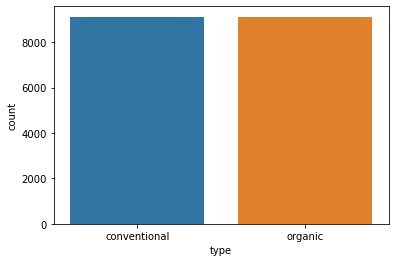

In [12]:
#we've 2 classes in type column, let's plot this information
sns.countplot(data['type'])

In [13]:
data['region']. value_counts()

Roanoke                338
Boise                  338
NewYork                338
TotalUS                338
RichmondNorfolk        338
LasVegas               338
NewOrleansMobile       338
NorthernNewEngland     338
West                   338
CincinnatiDayton       338
SouthCarolina          338
Northeast              338
Jacksonville           338
Portland               338
BuffaloRochester       338
Midsouth               338
DallasFtWorth          338
Tampa                  338
Louisville             338
Albany                 338
Houston                338
Spokane                338
Charlotte              338
Philadelphia           338
Columbus               338
Southeast              338
Denver                 338
Detroit                338
California             338
LosAngeles             338
Seattle                338
RaleighGreensboro      338
Chicago                338
Indianapolis           338
Plains                 338
GreatLakes             338
Syracuse               338
B

# EDA

# univariate analysis

<AxesSubplot:xlabel='AveragePrice', ylabel='Count'>

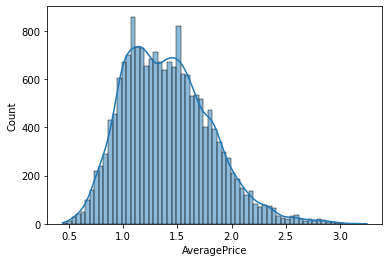

In [14]:
sns.histplot(data=data, x="AveragePrice", kde = True)

In [15]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [16]:
num_data = pd.DataFrame({})
for column in data.columns:
    if data[column].dtype == object:
        continue
    num_data[column] = data[column]
num_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   year          18249 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.4 MB


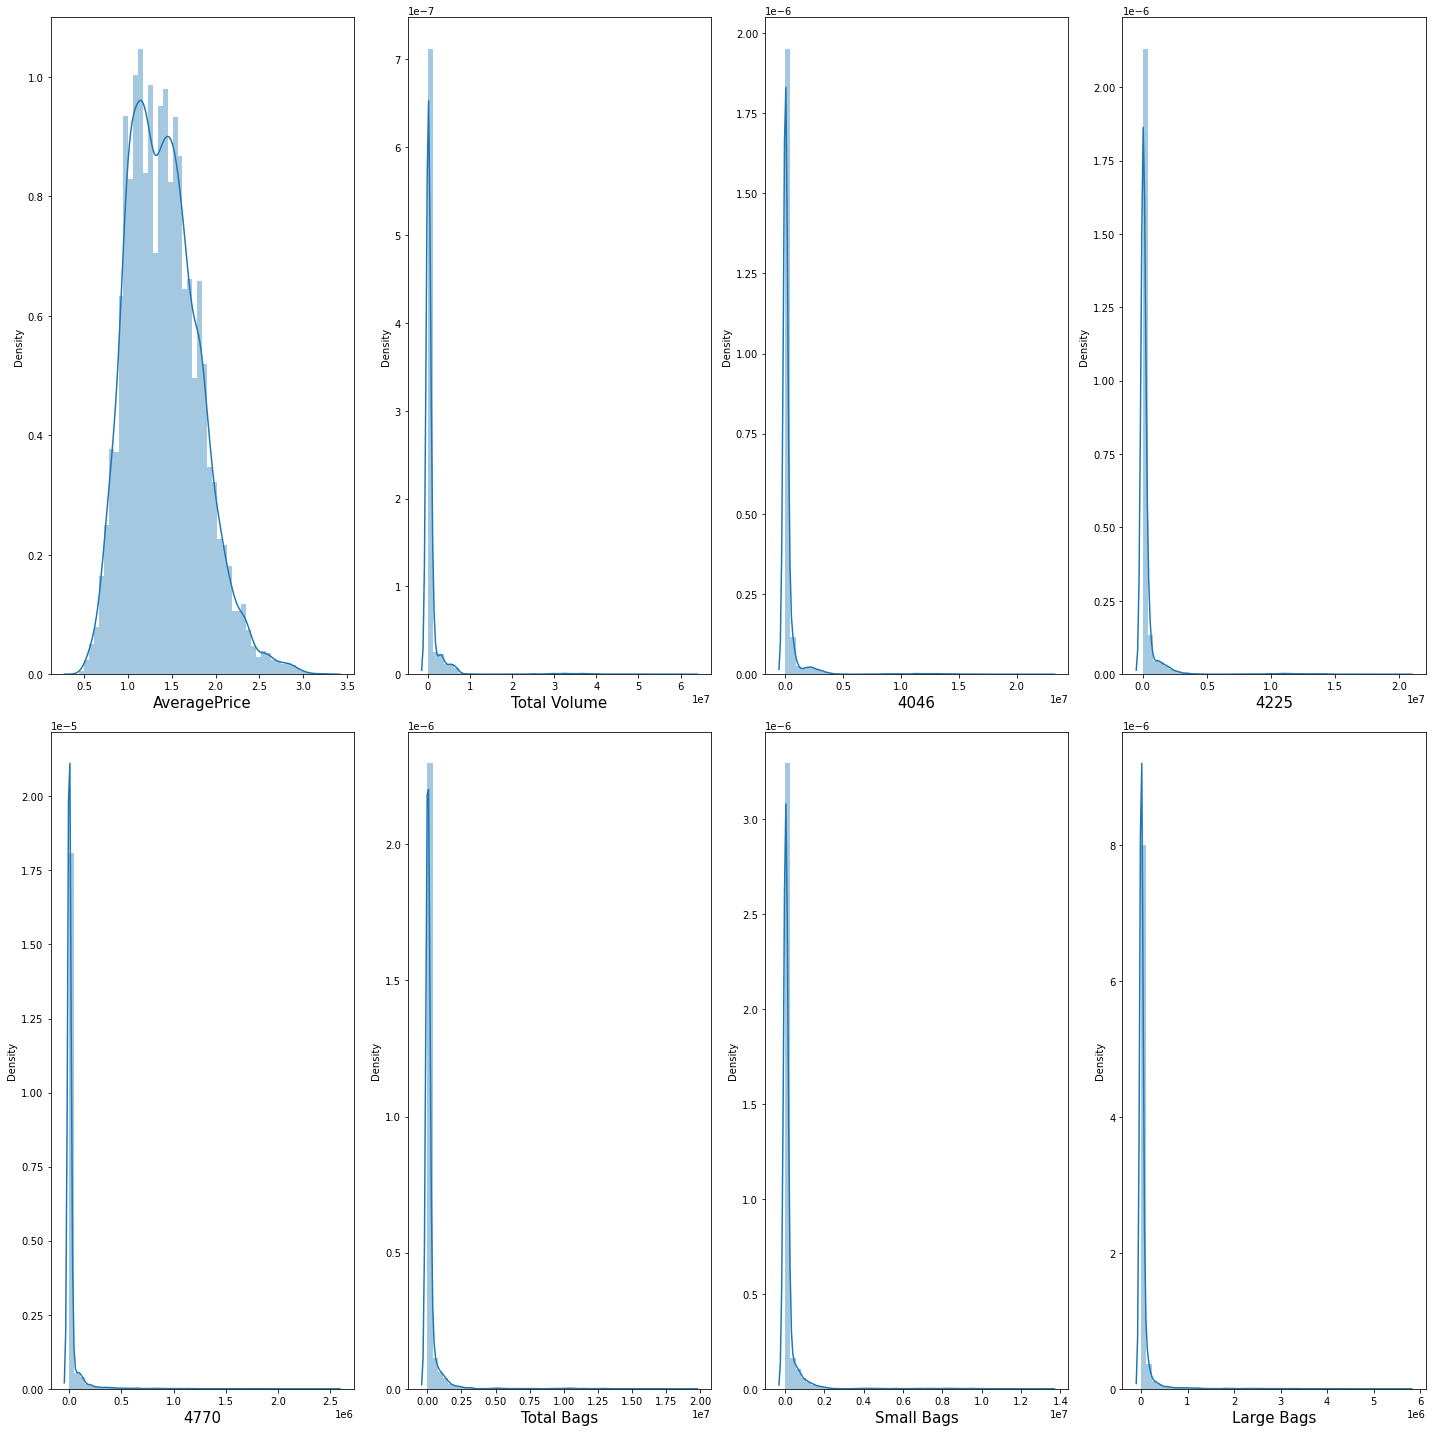

In [17]:
plt.figure(figsize =(20,20), facecolor = 'white')
plotnumber=1

for column in num_data.columns:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(num_data[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

In [18]:
len(num_data.columns)

10

# Transforming our columns for removing skewness

In [19]:
#we can see that our data is skewed
from scipy import stats
from sklearn.preprocessing import PowerTransformer
for column in num_data.columns:
    num_data[column], lmbda = stats.yeojohnson(num_data[column])
num_data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,1.824900e+04
mean,0.752367,10.180711,11.120521,14.025886,4.709809,12.200414,14.424298,10.145117,0.854866,4.168322e-01
std,0.124870,1.862084,4.745245,5.147150,3.803522,3.140064,4.994551,6.164884,1.221534,5.496664e-12
min,0.344284,4.272630,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,4.168322e-01
25%,0.660863,8.542902,7.741269,10.383954,-0.000000,9.840995,10.698756,5.812056,-0.000000,4.168322e-01
50%,0.754567,10.436891,10.908326,14.393487,5.001171,12.648867,14.943554,10.606881,-0.000000,4.168322e-01
75%,0.840696,11.550171,14.756609,17.672498,8.123567,14.121274,17.418011,14.641734,2.410423,4.168322e-01
max,1.159576,15.296525,24.149946,29.746419,13.052471,22.335541,31.117116,28.678717,2.958435,4.168322e-01


In [20]:
# Let's change date column to datetime datatype
data['Date'] = pd.to_datetime(data['Date'])

In [21]:
for column in num_data.columns:
    data[column] = num_data[column]


In [22]:
# #Correlation
data.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.594438,-0.571671,-0.471679,-0.518245,-0.577309,-0.505766,-0.497845,-0.413198,0.091992
Total Volume,-0.594438,1.000000,0.897379,0.927606,0.831148,0.940552,0.906145,0.706269,0.654958,0.088538
4046,-0.571671,0.897379,1.000000,0.786025,0.756059,0.811043,0.791672,0.632600,0.603989,0.011928
4225,-0.471679,0.927606,0.786025,1.000000,0.810136,0.826776,0.793284,0.650405,0.612979,0.009654
4770,-0.518245,0.831148,0.756059,0.810136,1.000000,0.777302,0.769368,0.582207,0.643383,-0.038691
Total Bags,-0.577309,0.940552,0.811043,0.826776,0.777302,1.000000,0.950131,0.749597,0.638134,0.216817
Small Bags,-0.505766,0.906145,0.791672,0.793284,0.769368,0.950131,1.000000,0.599769,0.627896,0.192223
Large Bags,-0.497845,0.706269,0.632600,0.650405,0.582207,0.749597,0.599769,1.000000,0.491946,0.192110
XLarge Bags,-0.413198,0.654958,0.603989,0.612979,0.643383,0.638134,0.627896,0.491946,1.000000,0.164921
year,0.091992,0.088538,0.011928,0.009654,-0.038691,0.216817,0.192223,0.192110,0.164921,1.000000


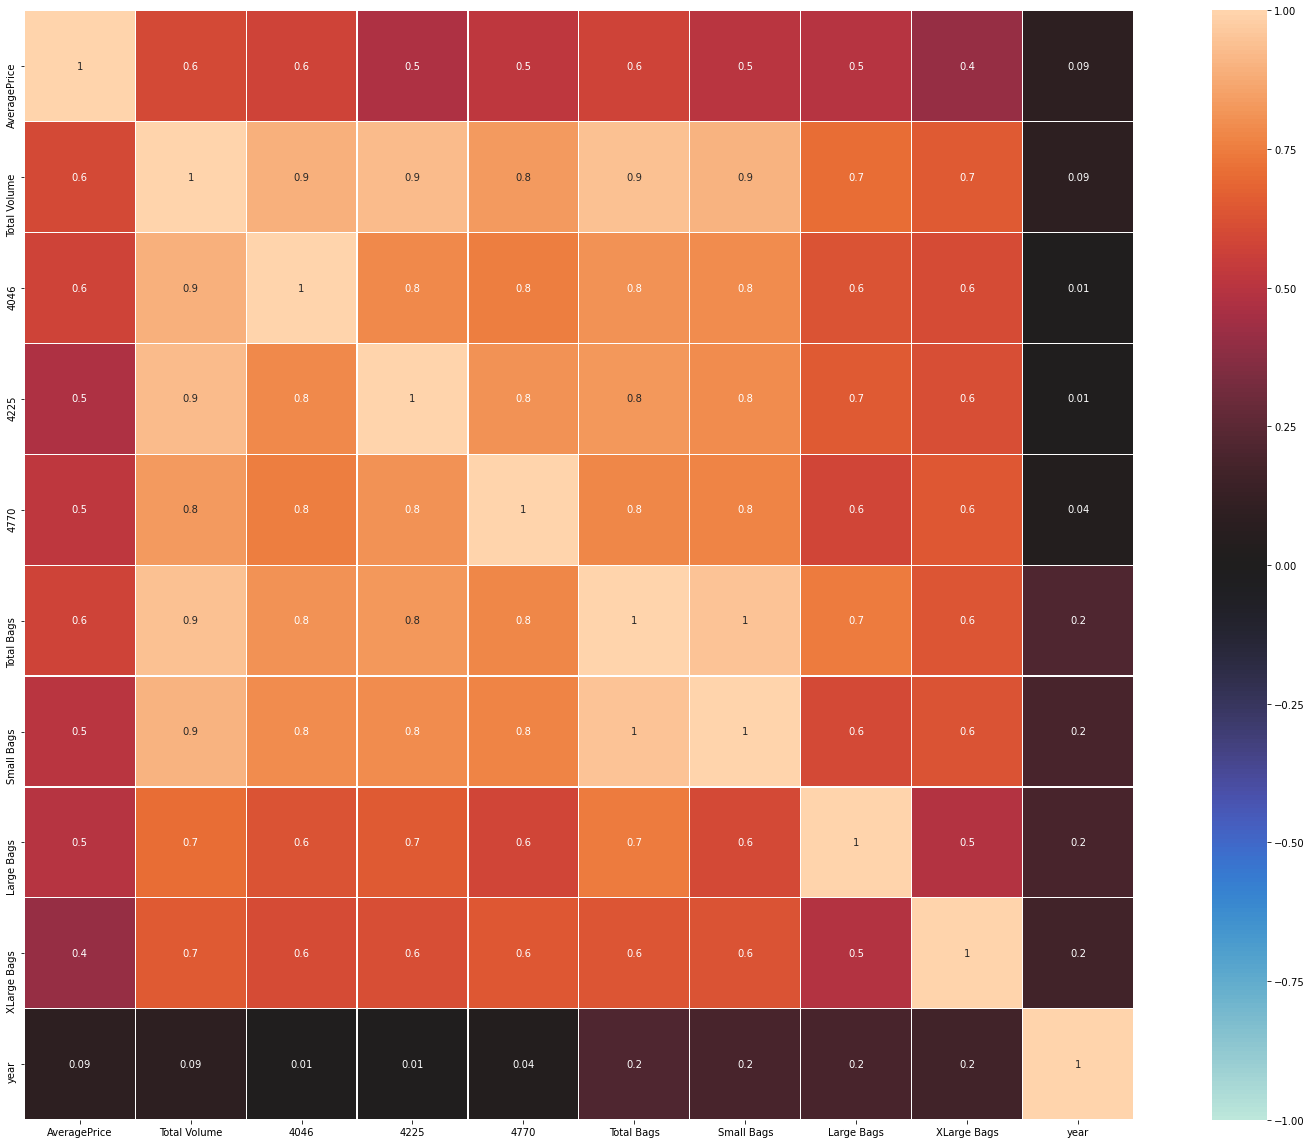

In [23]:
df_corr = data.corr().abs()
plt.figure(figsize = (22,16))
sns.heatmap(df_corr, vmin = -1, vmax = 1, annot = True, square = True, center = 0, fmt = '.1g', linewidths = .1)
plt.tight_layout()

In [24]:
# data.index

In [25]:
# data.loc[0]

# Encoding Categorical variable

In [26]:
# we have only 2 columns that are of string type (region and type)

cat_data = pd.DataFrame({})
for column in data.columns:
    if data[column].dtype == object:
        cat_data[column] = data[column]
cat_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    18249 non-null  object
 1   region  18249 non-null  object
dtypes: object(2)
memory usage: 285.3+ KB


# Label Encoder

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
lencoded_data = cat_data.apply(LabelEncoder().fit_transform)
lencoded_data.head()

,type,region
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [28]:
for column in lencoded_data.columns:
    data[column] = lencoded_data[column]


In [29]:
#Correlation
data.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
AveragePrice,1.000000,-0.594438,-0.571671,-0.471679,-0.518245,-0.577309,-0.505766,-0.497845,-0.413198,0.621587,0.091992,-0.018345
Total Volume,-0.594438,1.000000,0.897379,0.927606,0.831148,0.940552,0.906145,0.706269,0.654958,-0.798179,0.088538,0.109462
4046,-0.571671,0.897379,1.000000,0.786025,0.756059,0.811043,0.791672,0.632600,0.603989,-0.726710,0.011928,0.196918
4225,-0.471679,0.927606,0.786025,1.000000,0.810136,0.826776,0.793284,0.650405,0.612979,-0.744364,0.009654,0.080366
4770,-0.518245,0.831148,0.756059,0.810136,1.000000,0.777302,0.769368,0.582207,0.643383,-0.784707,-0.038691,0.073381
Total Bags,-0.577309,0.940552,0.811043,0.826776,0.777302,1.000000,0.950131,0.749597,0.638134,-0.723637,0.216817,0.112620
Small Bags,-0.505766,0.906145,0.791672,0.793284,0.769368,0.950131,1.000000,0.599769,0.627896,-0.716759,0.192223,0.098960
Large Bags,-0.497845,0.706269,0.632600,0.650405,0.582207,0.749597,0.599769,1.000000,0.491946,-0.514393,0.192110,0.133660
XLarge Bags,-0.413198,0.654958,0.603989,0.612979,0.643383,0.638134,0.627896,0.491946,1.000000,-0.673954,0.164921,0.014411
type,0.621587,-0.798179,-0.726710,-0.744364,-0.784707,-0.723637,-0.716759,-0.514393,-0.673954,1.000000,-0.000032,-0.000280


In [30]:
data = data.drop('Date',axis=1)

In [31]:
# Our data is not multicollinear and we are good to proceed further
x = data.drop(columns = ['AveragePrice'], axis = 1)# Dividing our data into features and labels

y = data['AveragePrice']

# Scaling

In [32]:
from sklearn.preprocessing import StandardScaler # Scaling our featture data
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)

# Train test Split

In [67]:
x_train, x_test, y_train, y_test  = train_test_split(x_scaler,y,test_size = 0.25, random_state=1)

In [68]:
from sklearn import metrics #Import Metrics for further use

# Linear regression Model

In [69]:
regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

In [70]:
regression.score(x_train, y_train)

0.5331217199113625

In [71]:
lr_pred = regression.predict(x_train)

In [72]:
regression.score(x_test, y_test)

0.5414626740055521

In [73]:
R2_lr = metrics.r2_score(y_train, lr_pred)

In [74]:
from sklearn.model_selection import cross_val_score
regression_cv_score = cross_val_score(regression, x, y, cv = 5)
regression_cv_mean = regression_cv_score.mean()
R2_lr - regression_cv_mean ## Difference in R2 score and cross validation score

0.3212847115966782

# Lasso regression

In [75]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
lasscv = LassoCV(alphas = None, normalize = True)
lasscv.fit(x_train,y_train)

LassoCV(normalize=True)

In [76]:
alpha = lasscv.alpha_ # finding alpha 
alpha

6.623418498657983e-07

In [77]:
lasso_reg = Lasso(alpha)  # Training our model with alpha
lasso_reg.fit(x_train, y_train)

Lasso(alpha=6.623418498657983e-07)

In [78]:
lasso_reg.score(x_train, y_train)

0.5331217171863651

In [79]:
lassor_pred = lasso_reg.predict(x_test)

In [80]:
lassor_pred = lasso_reg.predict(x_test)

In [81]:
lasso_reg.score(x_test, y_test)

0.54146397468249

In [82]:
R2_lasso = metrics.r2_score(y_test, lassor_pred)
lasso_reg_cv_score = cross_val_score(lasso_reg, x, y, cv = 5)
lasso_reg_cv_mean = lasso_reg_cv_score.mean()
R2_lasso - lasso_reg_cv_mean ## Difference in R2 score and cross validation score

0.464554575743916

# Ada-Boost regression

In [83]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()

In [84]:
ada.fit(x_train, y_train) # Model Training

AdaBoostRegressor()

In [85]:
ada.score(x_train, y_train)

0.5457865090863074

In [86]:
ada_pred = ada.predict(x_test) #predictionmetrics.r2_score(y_test, ada_pred)# R2 Score

In [87]:
R2_ada = metrics.r2_score(y_test, ada_pred)# R2 Score
ada_cv_score = cross_val_score(ada, x, y, cv = 5)
ada_cv_mean = ada_cv_score.mean()
R2_ada - ada_cv_mean ## Difference in R2 score and cross validation score

0.544324448775139

# Random Forest regression

In [88]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth = 5) #without hyperparameter tuning

In [89]:
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=5)

In [90]:
rf.score(x_train, y_train)

0.6293103812089729

In [91]:
rf_y_pred = rf.predict(x_test)

In [92]:
R2_rf = metrics.r2_score(y_test, rf_y_pred)# R2 Score
rf_cv_score = cross_val_score(rf, x, y, cv = 5)
rf_cv_mean = rf_cv_score.mean()
R2_rf - rf_cv_mean ## Difference in R2 score and cross validation score

0.48484535557886443

In [93]:
# Score is better than our previous models
# Now let's us apply hyperparameter tuning to this model

# Hyperparameter Tuning

In [94]:
from sklearn.model_selection import GridSearchCV
params = {'n_estimators':[25,35],
         'max_depth':[9,20],
         'min_samples_split':[4,8],
         'min_samples_leaf':[10,25],
         }

         
grd = GridSearchCV(rf, param_grid = params)
grd.fit(x_train, y_train)
print('best_param = >', grd.best_params_)

best_param = > {'max_depth': 20, 'min_samples_leaf': 10, 'min_samples_split': 8, 'n_estimators': 35}


In [95]:
RF = RandomForestRegressor(max_depth=20, min_samples_leaf=10,
                       min_samples_split=4, n_estimators=35)

In [96]:
RF.fit(x_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=10, min_samples_split=4,
                      n_estimators=35)

In [97]:
RF.score(x_train, y_train)

0.8778327991527474

In [98]:
RF_y_pred = RF.predict(x_test)

In [99]:
metrics.r2_score(y_test, RF_y_pred)# R2 Score

0.8141642267884477

# Saving our Model

In [100]:
# Let's save our model
import pickle
filename = "Avocado"
pickle.dump(RF, open(filename,'wb'))